<a href="https://colab.research.google.com/github/vishnupm-22/Customer_Segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROBLEM STATEMENT**:
Implement KMeans clustering to develop a mall customer segmentation strategy based on customer behavior and demographic data to enhance marketing and optimize space utilization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### **DATA GATHERING**
Opening a local csv file using pandas 'read_csv' function

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_sets/Mall_Customers.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data contains 5 features : CustomerID	,Gender,	Age,	Annual Income ,Spending Score of a customer

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


demographic data plays a crucial role in identifying patterns and preferences among different consumer groups. So Features like Age,Gender,Annual Income and Spending Score are important for grouping the data
* We will drop the CustomerID feature as it is just a number that is tagged to a customer.


In [ ]:
X = data.iloc[:,slice(1,5)]

In [ ]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## **EDA**


### Univariate Analysis
  * Gender, the only categorical feature, data displays a normally distribution.
  * Distribution of Age and Annual Income (k$) is positively skewed

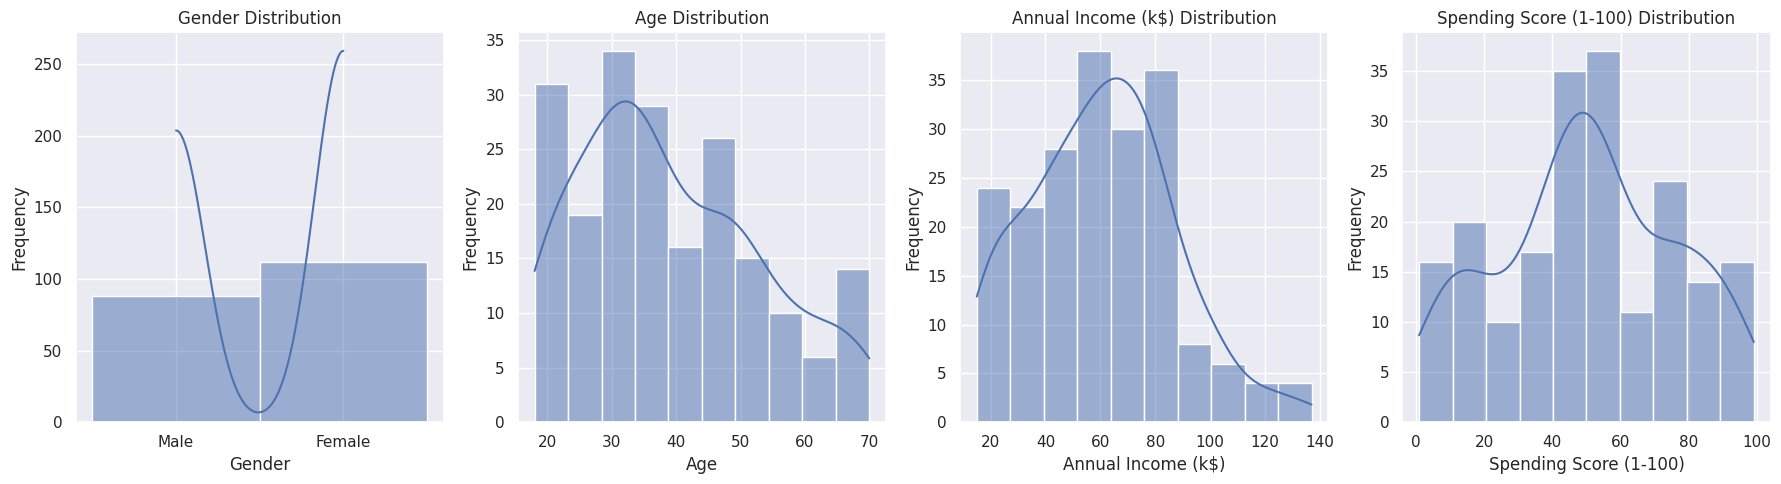

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
features = ['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(features)):
    sns.histplot(X[features[i]], bins=10, kde=True, ax=axs[i])
    axs[i].set_xlabel(features[i])
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(features[i] + ' Distribution')
plt.tight_layout()
plt.show()

**Box Plot** :  useful for identifying the distribution of data and highlighting any potential outliers.
  * There are no outliers in the data

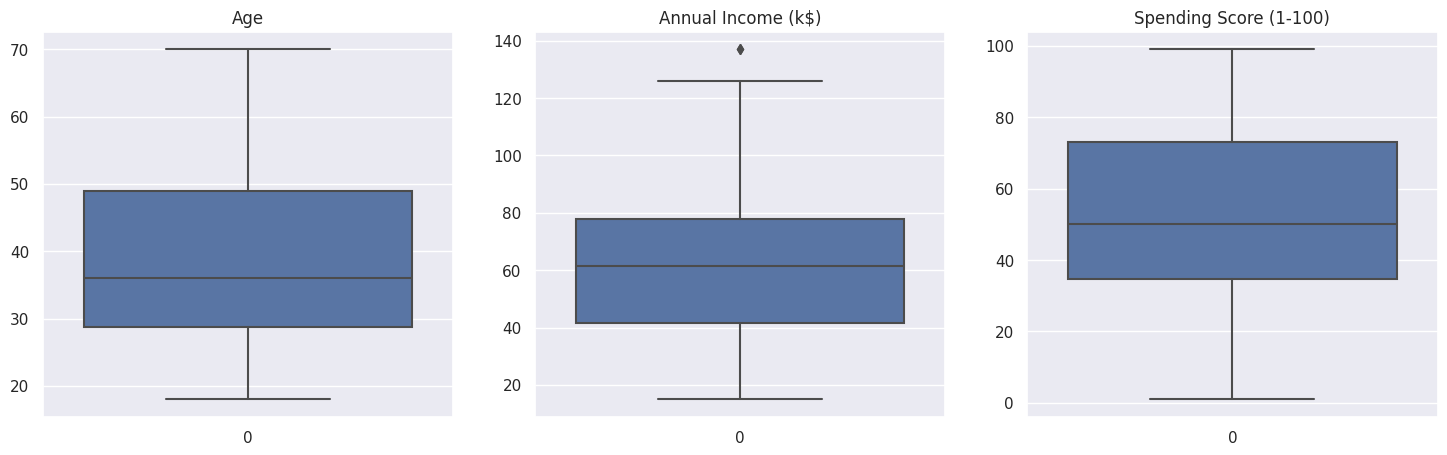

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (18,5))
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in range(len(numerical_features)):
    plt.subplot(1,3, (i )  + 1)
    ax = sns.boxplot( X[numerical_features[i]])
    title = numerical_features[i]
    plt.title(title)

**Bar and Pie plot** :
* Gender distribution : plotting Bar,pie chart shows female customers just edge out the male customers.


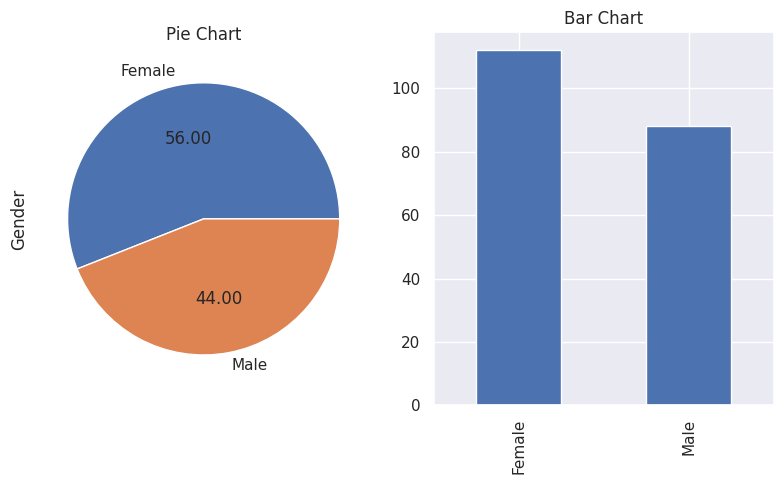

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(8,5))
data['Gender'].value_counts().plot(kind='pie',labels=['Female','Male'],autopct="%0.2f",ax=axs[0])
axs[0].set_title('Pie Chart')
data['Gender'].value_counts().plot(kind='bar',ax=axs[1])
axs[1].set_title('Bar Chart')
plt.tight_layout()
plt.show()

**Bivariate Analysis**
  

* **Pair Plot** :
       Numerical Features vs Numerical Features:
       * if you observe the Scatter plot between Annual Income and
          Spending Score have some groupings in the data. These groupings may suggest the presence of clusters.

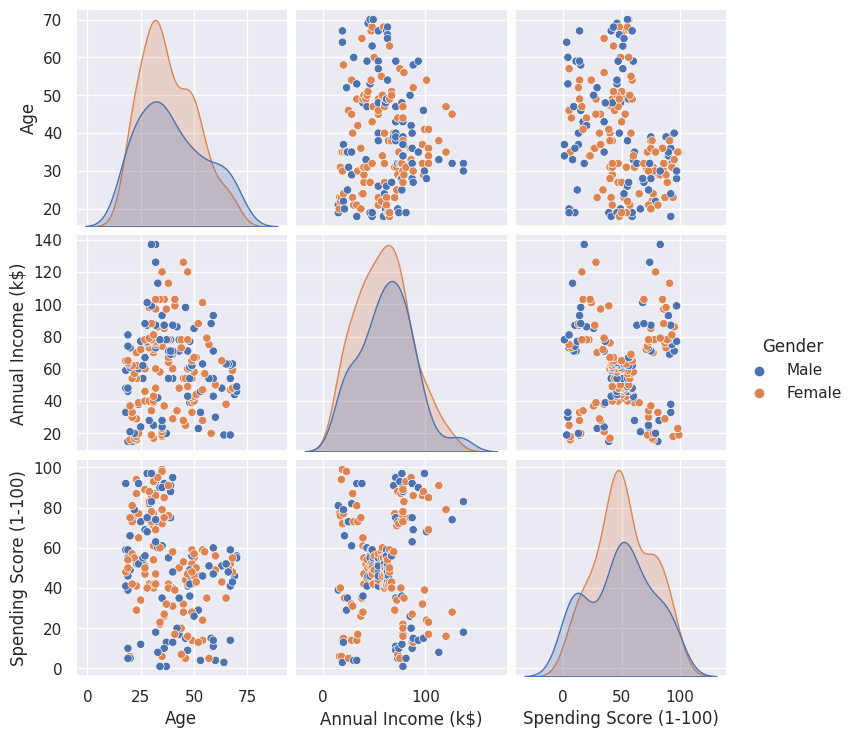

In [ ]:
sns.pairplot(X,hue='Gender')

* From the correlation matrix we can say that
      * Annual Income and Spending Score are positively correlated
      * Age wrt to  Annual Income and Spending Score are negatively correlated

<ipython-input-129-c12a55ad34c6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),cmap = 'inferno',annot = True,cbar = 'True');


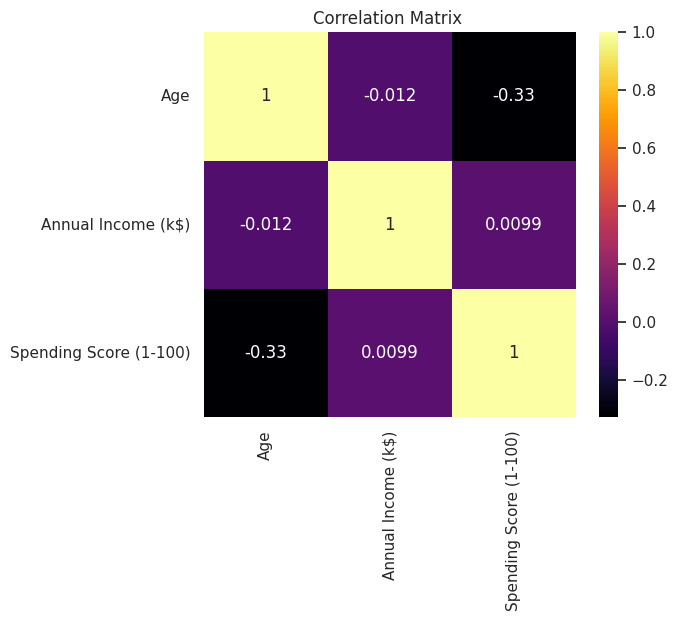

In [ ]:
fig,ax = plt.subplots(nrows = 1, ncols = 1,figsize = (6,5))
plt.subplot(1,1,1)
sns.heatmap(X.corr(),cmap = 'inferno',annot = True,cbar = 'True');
plt.title('Correlation Matrix ');

***Box,Violin Plot*** :
* Numerical Features vs Categorical Features
      * male customers tapers very sharply at the apex with some outliers as compared to female customers.





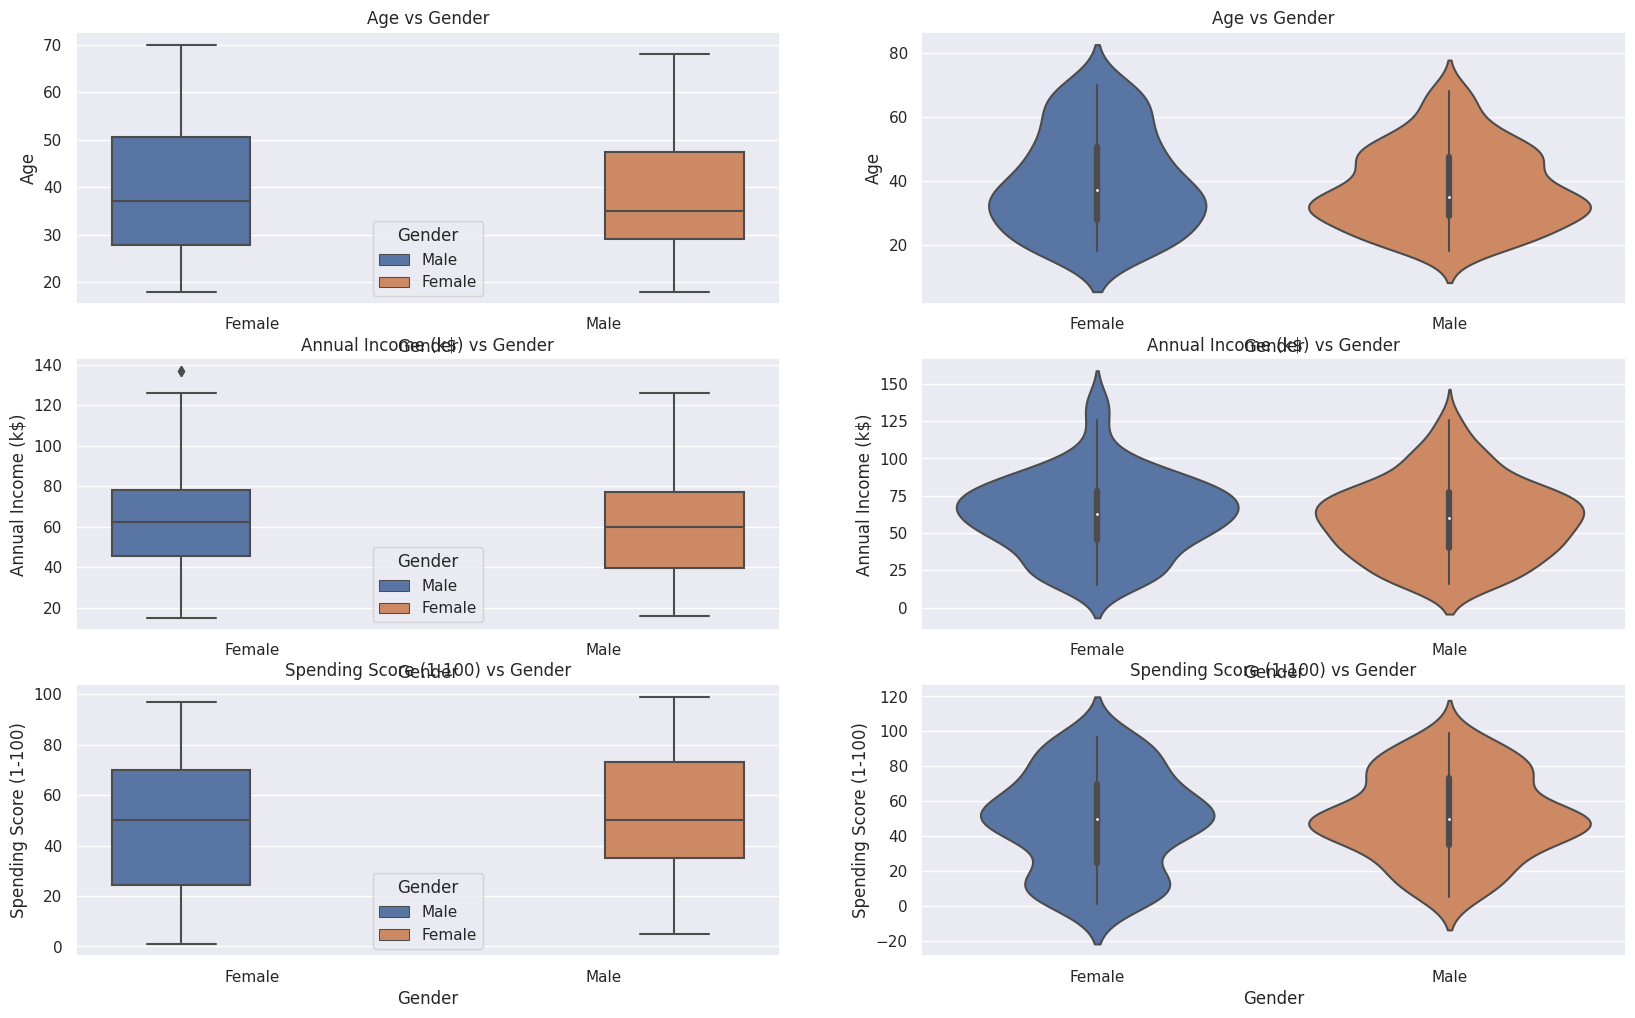

In [ ]:
fig = plt.subplots(nrows = 3,ncols = 2,figsize = (20,12))
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in range(len(numerical_features)):
    plt.subplot(3,2, (i * 2)  + 1)
    ax = sns.boxplot(x = 'Gender',y = numerical_features[i],data = X,hue='Gender')
    ax.set_xticklabels(['Female','Male'])
    title = numerical_features[i] + ' vs Gender'
    plt.title(title)

    plt.subplot(3,2,(i * 2) + 2)
    ax = sns.violinplot(x = 'Gender',y = numerical_features[i],data = X)
    ax.set_xticklabels(['Female','Male'])
    title = numerical_features[i] + ' vs Gender'
    plt.title(title)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender']= le.fit_transform(X['Gender'])

### **`FEATURE SCALING`**
          * Normalization is done for features that does not display a normal distribution

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

**FEATURE EXTRACTION**
  * Applying PCA technique to reduce the dimension from 4d to 2d and
    to visualize the clusters in 2d


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X

**MODELLING**
* Choose the number of clusters, K and initialize centroids
* Assign clusters
* Move the centroids
* repeat step 2 and 3 until convergence
* finish



k hyperparameter : It defines the number of clusters or groups the data is to be divided into. For the selection of values of k we use elbow method:
  * Elbow Method : It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.


In [ ]:
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

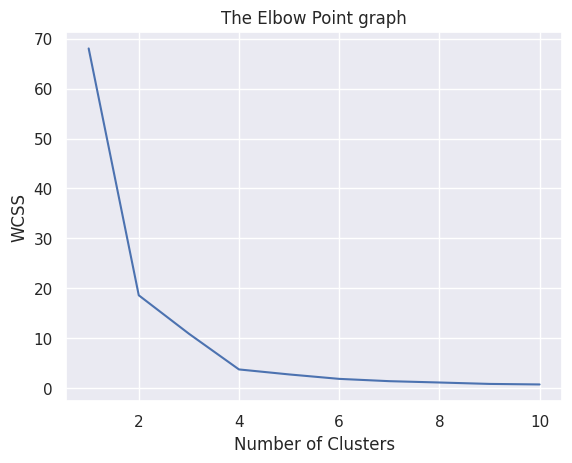

In [ ]:

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=0)
Y = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualizing the data in 2-D**

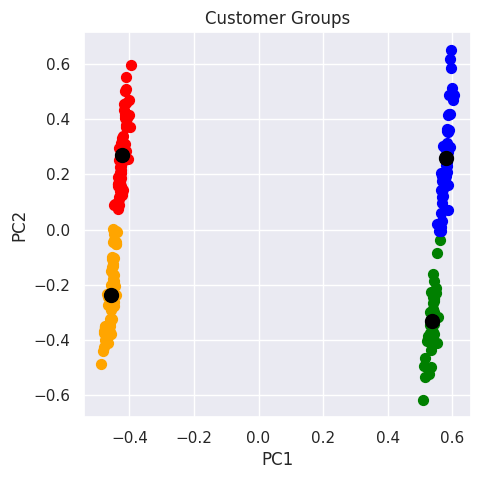

In [ ]:

plt.figure(figsize=(5,5))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='orange', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()